
## Policies


This take-home exam consists of five exercises meant to verify students' mastery of course concepts introduced over the past fourteen weeks. Students may access any static resources they wish during the assessment period, however they cannot seek/provide any assistance from/to peers. Students must work alone and cannot collaborate with any other intelligent entity (human or artificial) to formulate their responses. Use of artificial intelligence tools such as ChatGPT is also strictly prohibited. All of the work submitted must be generated by the test-taker and the test-taker alone - without input or influence from any other party (human or artificial). Students may not share, disseminate, or discuss these questions with any other student in this course until the exam period has concluded; doing so is considered academic dishonesty. 

Students are, however, permitted to use any and all information resources they deem prudent. That means leveraging threads authored before December 13th, 2023 on Stack Overflow is 100% acceptable, but asking chatGPT to write your responses is going to earn you a zero on this exam.

Upon completion and submission of this assessment students must delete any saved copies of this Jupyter notebook on their personal device. This notebook may not be posted online, shared, or disseminated in any way, shape, or form. There will be zero tolerance towards academic dishonesty. Any failure to demonstrate the utmost integrity will result in an automatic failure for this assessment and will be referred to the University Administration for sanction.

## Instructions

The assessment will consist of five multi-part questions compiled both in this Jupyter Notebook and using arcGIS Pro. Students are welcome to access old Jupyter notebooks, code library documentation, and other static internet resources in forming their responses to the questions in this assessment. It is expected that students will enter code into the provided codeblocks to answer the associated prompts. Students may generate additional codeblocks to test their responses, however all user-created codeblocks must be deleted prior to submission. Students are encouraged to comment code where appropriate to demonstrate understanding, but trust that so long as a student's code generates the requested output for a particular prompt they will be awarded full credit.

Several prompts will require students to access data saved on the course Canvas page. These files are saved in a module titled "Take-Home Final Exam" that will appear near the top of the course landing page. 

Once a student has completed the assessment students should save their work and rename the Jupyter Notebook containing their responses using the naming convention [FirstName_LastName.ipynb]. Once all output files are saved and appropriately named students must submit that file via the appropriate grade item on the course's Canvas page no later than 7:25pm on 12/15/2023.


# Exercise \#1

I would like to know more about your 'Big Data' group project. 

A. Describe, in as much detail as possible, the specific responsibilities and contributions of each group member, including yourself. Include a numeric estimate (%) of each member's proportional contribution to the final product. (4 points)

At the start of the project we split up the responsibilities very well in my opinion. The main responsibility of everyone in the group was for Pete to handle the overall writing aspect, so the introduction, conclusion, and taking the descriptions of the visualizations others created to make it into paper format. Ben was assigned to do the geomapping aspect of the project, so he created multiple maps to better describe and visualize what was going on in Baltimore. Nanyi, Yuqing, and I were in charge of doing any other analysis of our main dataset and other smaller datasets. We all did a little bit of base analysis on the same topics but then went seperate ways for deeper analysis to get the most variety of conclusions. I would give all 5 of us a 20% contribution to the final product because we all did a significant part of the project.

B. Explain anything I should know about how your group collaborated. Did everyone in the group participate actively? Were all members engaged and did they fulfill their assigned tasks? (2 points)

Most of our collaboration and communication was done via a snapchat groupchat. We did get on a couple facetime calls when we needed to re-assign certain tasks and make sure that everyone was on the same page. Anytime there was an interim due date, we were always able to figure out efficiently who would be the one to hand it in and how each person could add to it. We would share documents and slide shows so that everybody could work on it at the same time. I think everybody was actively participating. We tended to kind of take breaks when there was not a due date for a long period of time, but I believe that is fair because everyone has other classwork to tend to as well. Everybody fulfilled their assigned task when it needed to be done which is why our group dynamic worked so well.

C. Did you do your best work on this project? Why or why not? What do you expect others will say about your contribution? Is there anything you would like to clarify about your efforts to complete this project? (2 points)

I think that I did my best work on this project. Right off the bat I tried to do a lot of base analysis on the main dataset to help the group understand what the data was showing. I also communicated in the snapchat groupchat a large amount with suggestions and advice for further goals we should set for the project. I think that others will say that I contributed a large amount to the project and was always actively making sure we could get each part done on time. 

# Exercise \#2


For this problem, please use the "Murder_And_Execution.csv" uploaded to Canvas. This is a manufactured data set that contains example (not actual) data on the numbers of murders and executions players occurring in each U.S. county from 2012-2022.  It contains 23,960 observations on 13 variables. 

Your job is to use Python to define and estimate a well-specified model relating the murder rate (number of murders per capita) to the other variables in the dataset using various model selection algorithms. Comment each line of code in your response to indicate (1) what the code is doing and (2) why it is necessary/appropriate to the analysis. A description of each variable appears below:

- stname: state name
- statefips: state FIPS code
- county: county name
- countyfips: county FIPS code
- arrests: # of murder arrests
- density: population density; per square mile  
- popul: county population
- percblack: percent population black
- percmale: percent population male  
- rpcpersinc: real per capita personal income
- year: 2012-2022
- murders: # of murders
- execs: # of executions


A. Before you proceed, first consider the addition of additional independent variables. These could be transformed variables (logs, per capita rates, etc.), quadratic terms, and/or interactions. 

Explain the theorhetical motivation or qualitative criteria you use to generate and consider each additional independent variable. (2 points)

In [61]:
import pandas as pd
import numpy as np 

# load the dataset
murder_df = pd.read_csv("../data/Murder_And_Execution.csv")

# log transformation of density -> impact of population density on murder rate may decrease as density increases
murder_df["log_density"] = np.log(murder_df["density"])

# Create murder per capita variable -> can control for differences in population sizes
murder_df["murders_per_capita"] = murder_df["murders"] / murder_df["popul"]
murder_df["arrests_per_capita"] = murder_df["arrests"] / murder_df["popul"]

# add an interaction term between density and income -> maybe the impact of income on murder rate also depends on the population density
murder_df["density*income"] = murder_df["log_density"] * murder_df["rpcpersinc"]

murder_df

,stname,statefips,county,countyfips,arrests,density,popul,percblack,percmale,rpcpersinc,year,murders,execs,log_density,murders_per_capita,arrests_per_capita,density*income
0,Alabama,1,Autauga County,1,1,55.180000,32888,20.720000,40.41000,9885.96,2012,4,0,4.010601,0.000122,0.000030,39648.636799
1,Alabama,1,Autauga County,1,2,55.810000,33264,20.490000,40.43000,10254.63,2013,1,0,4.021953,0.000030,0.000060,41243.640557
2,Alabama,1,Autauga County,1,0,56.430000,33632,20.310000,40.42000,10596.15,2014,0,0,4.033001,0.000000,0.000000,42734.282825
3,Alabama,1,Autauga County,1,5,57.030000,33992,20.120000,40.46000,10844.46,2015,3,0,4.043577,0.000088,0.000147,43850.413861
4,Alabama,1,Autauga County,1,0,57.910000,34512,20.190000,40.46000,10975.24,2016,1,0,4.058890,0.000029,0.000000,44547.292775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23955,Wyoming,56,Weston County,45,0,2.680000,6430,0.060000,42.67000,13774.45,2018,0,0,0.985817,0.000000,0.000000,13579.084145
23956,Wyoming,56,Weston County,45,1,2.708031,6493,0.077006,50.13091,14062.13,2019,0,0,0.996222,0.000000,0.000154,14009.000496
23957,Wyoming,56,Weston County,45,0,2.736391,6561,0.030483,50.16004,13463.55,2020,0,0,1.006640,0.000000,0.000000,13552.946611
23958,Wyoming,56,Weston County,45,0,2.730135,6546,0.076383,50.18332,13489.33,2021,0,0,1.004351,0.000000,0.000000,13548.022864


B. Create three data visualizations to investigate the relationships between the variables. Explain why you chose each set of variables and how each visualization helped to inform your understanding of the data's structure. (2 points)


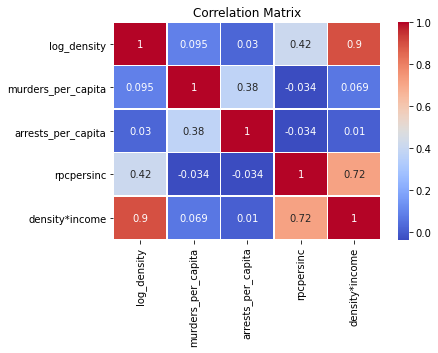

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# this created a correlation matrix, to make a visual representation of the relationships between the relevant variables. It helps identify strong correlations (or weak ones)
# I chose these variables because I believe that thy will be the most correlated with the murder rate
corr_matrix = murder_df[['log_density', 'murders_per_capita', "arrests_per_capita", 'rpcpersinc', 'density*income']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

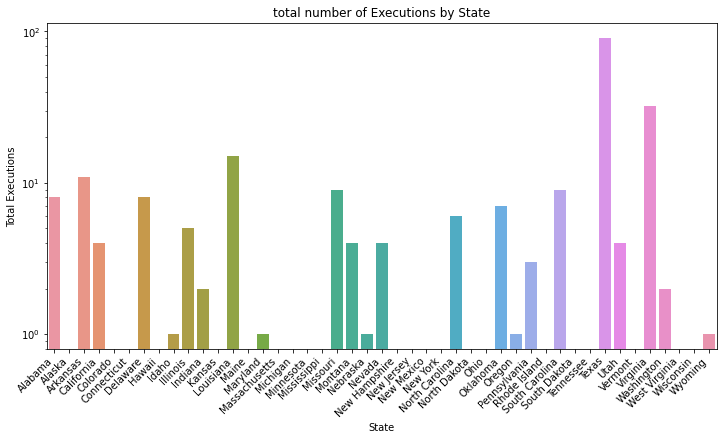

In [63]:
# Create a bar plot that displays the counts of executions in each state 
# This gives insights into the distribution of the execution variable and gives more understanding of the data.
# It is on a log scale to better visualize the difference of the states with very low number of executions
plt.figure(figsize=(12, 6))
sns.barplot(x='stname', y='execs', data=murder_df, estimator=sum, ci=None)
plt.title('total number of Executions by State')
plt.xlabel('State')
plt.ylabel('Total Executions')
plt.yscale("log")
plt.xticks(rotation=45, ha='right')
plt.show()

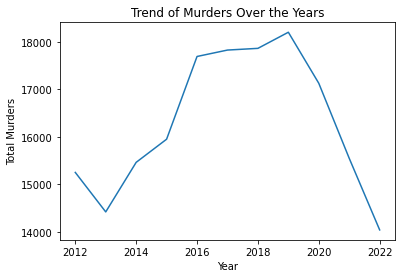

In [64]:
# Create a line plot to show the trend in the number of murders over all the years in the dataset
# this graph helps us visualize a time trend to better understand how the murders and murder rate may change over time
plt.plot(murder_df.groupby('year')['murders'].sum())
plt.title('Trend of Murders Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Murders')
plt.show()

C. Propose a well-specified model relating the murder rate (number of murders per capita) to the other variables in the dataset. Report a summary table describing the model's fit and the statistical relationships (R-squared, coefficients, confidence intervals, etc.) between the variables. Explain what your model 'says' in detail. Be sure to discuss how strong the described associations are and how likely they are to be causal rather than statistical/spurious association. (2 points)

In [65]:
import statsmodels.api as sm

murder_df = murder_df.fillna(0)
Y = murder_df.murders_per_capita
X = murder_df.drop(["murders_per_capita", "stname", "county"], axis=1)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     murders_per_capita   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.455
Method:                 Least Squares   F-statistic:                              1430.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        20:12:28   Log-Likelihood:                      1.9540e+05
No. Observations:               23960   AIC:                                 -3.908e+05
Df Residuals:                   23946   BIC:                                 -3.906e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

The aboce summary table describes a lot about the model. First of all the R-Squared value is .455 which shows that the model is a pretty good fit accounting for almost half of the total variance in murder rate. There are a lot of coefficients in this model so I will describe one as an example. If you take rpcpersince for example, it has a negative coefficient which shows that holding all other variables constant, a one unit increase in income is associated with a decrease in the murder rate. Lastly if you look at the P values of the coefficients, you find that all of the values besides two are below .05 which shows that mot of the coefficients are statistically significant in how they impact the murder rate.

D. Implement the best subset variable selection algorithm. Comment your code and report back the optimal regression model identified by the algorithm. Estimate the linear regression model identified as 'best' and print the regression output table for the model. (3 points)


In [66]:
import itertools
import time

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(Y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - Y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the smallest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

print(getBest(8)["model"].summary())

Processed 3003 models on 8 predictors in 46.42557430267334 seconds.
                                 OLS Regression Results                                
Dep. Variable:     murders_per_capita   R-squared (uncentered):                   0.454
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              2486.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        20:13:17   Log-Likelihood:                      1.9536e+05
No. Observations:               23960   AIC:                                 -3.907e+05
Df Residuals:                   23952   BIC:                                 -3.906e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t 

E. Implement the forward stepwise variable selection algorithm. Comment your code and report back the optimal regression model identified by the algorithm. Estimate the linear regression model identified as 'best' and print the regression output table for the model. (3 points)

In [67]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    #print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

models_fwd = pd.DataFrame(columns=["RSS", "model"])
tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

print(models_fwd.loc[8, "model"].summary())

Total elapsed time: 1.023099422454834 seconds.
                                 OLS Regression Results                                
Dep. Variable:     murders_per_capita   R-squared (uncentered):                   0.454
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              2486.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        20:13:18   Log-Likelihood:                      1.9536e+05
No. Observations:               23960   AIC:                                 -3.907e+05
Df Residuals:                   23952   BIC:                                 -3.906e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.02

F. Implement the backward stepwise variable selection algorithm. Comment your code and report back the optimal regression model identified by the algorithm. Estimate the linear regression model identified as 'best' and print the regression output table for the model. (3 points)



In [68]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    #print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

print(models_bwd.loc[8, "model"].summary())

Total elapsed time: 1.5589241981506348 seconds.
                                 OLS Regression Results                                
Dep. Variable:     murders_per_capita   R-squared (uncentered):                   0.454
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              2486.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        20:13:19   Log-Likelihood:                      1.9536e+05
No. Observations:               23960   AIC:                                 -3.907e+05
Df Residuals:                   23952   BIC:                                 -3.906e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.0

G. Were any of the original variables in the dataset omitted from ALL the 'best' models identified in parts (D), (E), and (F)? If so, explain why you believe the variable(s) did not merit inclusion in any model. If not, explain why the best model differed depending on the variable selection algorithm employed. (3 points)

The best model from the best subset variable method and the backwards step method appear to be almost identical while the forward step method appears to have a few differences. They all have similar variable amoung them which is what I would expect because they all find the best model. When using 8 regressors it appears that there are a few variable that never show up in the models for example density and executions never shows up in any of the best models. These variable may not be as important as other variables because in the original model I created they were the only variable that were not statistically significant, so it makes sense why they may not be the first variables to include in the models.

# Exercise \#3

Investors tend to fall into one of two camps. Either they attempt to predict future prices through technical analysis of trading data and price trends, or they engage in fundamental analysis of the variables determining the profitability of a business enterprise and assume that will be incorporated into securities prices over time. In this exercise I would like you to engage in a basic technical analysis of the NASDAQ Composite Index (NASDAQCOM). 


A. Start by using ANY Python library to download the daily closing values for the NASDAQCOM from the St. Louis Federal Reserve Bank's FRED database for dates from 09/25/2017 through 09/25/2023. (1 point)


In [69]:
import datetime as dt
from pandas_datareader import data

# Use pandas datareader to download the daily closing values of NASDAQCOM
code = "NASDAQCOM"
start = dt.datetime(2017,9,25)
fred = data.DataReader(code, 'fred', start)
fred

,NASDAQCOM
DATE,
2017-09-25,6370.59
2017-09-26,6380.16
2017-09-27,6453.26
2017-09-28,6453.45
2017-09-29,6495.96
...,...
2023-09-19,13678.19
2023-09-20,13469.13
2023-09-21,13223.98


B. Generate a line graph of the closing price to see if a time trend exists in the series of closing prices. Does the data exhibit a trend? (2 points)


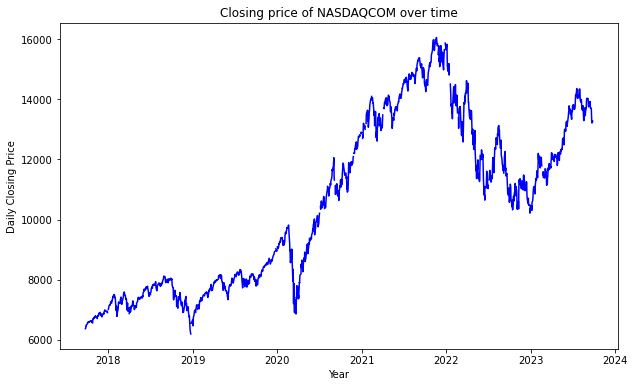

In [70]:
# Create a line plot the shows the change in the closing price of NASDAQCOM over time
# Yes there appears to be an upwards trend of the closing price of NASDAQCOM over time
plt.figure(figsize=(10, 6))
plt.plot(fred.index, fred["NASDAQCOM"], color="blue")
plt.xlabel('Year')
plt.ylabel('Daily Closing Price')
plt.title('Closing price of NASDAQCOM over time')
plt.show()

C. Generate a variable for the weekly average closing price. Generate a line graph of the weekly average closing price to see if a time trend (still) exists in the series of closing prices. Does the data exhibit a trend? A series exhibits a deterministic trend when it has either a systematic long-term increase or decrease. Does the data show evidence of seasonality or any pattern that repeats over fixed periods of time? How about heteroskedasticity: does the series' variability increase or decrease as a function of time? Depending on your answers to the above questions, it might be necessary to transform the data to generate a stationary process. (1 point)


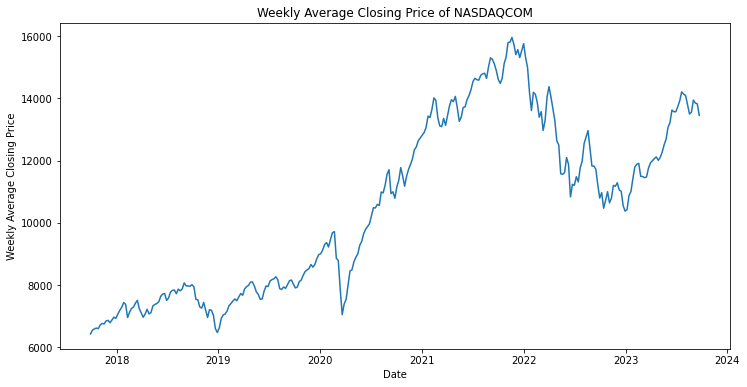

In [71]:
# Create a variable for the weekly average closing price
fred["Weekly_avg_close"] = fred["NASDAQCOM"].resample("W-Fri").mean()

# Create a line graph that shows weekly average closing price
plt.figure(figsize=(12, 6))
plt.plot(fred.dropna()['Weekly_avg_close'])
plt.title('Weekly Average Closing Price of NASDAQCOM')
plt.xlabel('Date')
plt.ylabel('Weekly Average Closing Price')
plt.show()

# Yes a time trend still exists in the data when just accounting for the weekly closing price
# The graph looks almost identical to the first graph I created previously except with a little less jaggedness to the lines
# There does appear to be a little bit of a seasonal aspect to the data. It looks like the price jumps at the start of the year usually
# The series variabilty seems to increase a little bit over time with more spikes and drops throughout the year

D. Generate variables for both the square root and the log of the weekly average closing price. (1 point)


In [72]:
#add the log and sqrt of weekly avg close price
fred["log_Weekly_avg_close"] = np.log(fred["NASDAQCOM"].resample("W-Fri").mean())
fred["sqrt_Weekly_avg_close"] = np.sqrt(fred["NASDAQCOM"].resample("W-Fri").mean())
fred

,NASDAQCOM,Weekly_avg_close,log_Weekly_avg_close,sqrt_Weekly_avg_close
DATE,,,,
2017-09-25,6370.59,NaN,NaN,NaN
2017-09-26,6380.16,NaN,NaN,NaN
2017-09-27,6453.26,NaN,NaN,NaN
2017-09-28,6453.45,NaN,NaN,NaN
2017-09-29,6495.96,6430.684,8.768836,80.191546
...,...,...,...,...
2023-09-19,13678.19,NaN,NaN,NaN
2023-09-20,13469.13,NaN,NaN,NaN
2023-09-21,13223.98,NaN,NaN,NaN


E. Plot a line graph with lines for both the first differences of the square root (make this line red) and the log of the weekly average closing price (make this line blue) across time. Which appears to show the most consistent variance? Pick one and use it for the remainder of this problem. (2 points)

<ipython-input-73-d26c7551a06d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fred2["diff_sqrt"] = fred2.loc[:, "sqrt_Weekly_avg_close"].diff()
<ipython-input-73-d26c7551a06d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fred2["diff_log"] = fred2.loc[:,"log_Weekly_avg_close"].diff()


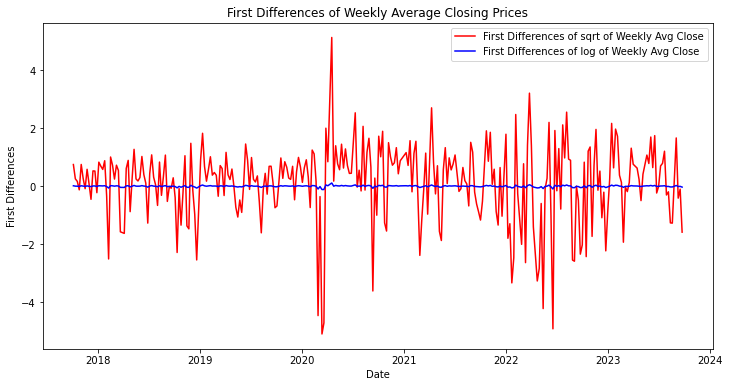

In [73]:
# create variable for the first difference of the sqrt and lof of weekly average close price
fred2 = fred.dropna()
fred2["diff_sqrt"] = fred2.loc[:, "sqrt_Weekly_avg_close"].diff()
fred2["diff_log"] = fred2.loc[:,"log_Weekly_avg_close"].diff()
fred2 = fred2.dropna()

# Plot the first differences as a line graph with sqrt being red and log being blue
plt.figure(figsize=(12, 6))
plt.plot(fred2["diff_sqrt"], color='red', label='First Differences of sqrt of Weekly Avg Close')
plt.plot(fred2["diff_log"], color='blue', label='First Differences of log of Weekly Avg Close')

plt.title('First Differences of Weekly Average Closing Prices')
plt.xlabel('Date')
plt.ylabel('First Differences')
plt.legend()
plt.show()

# the log of the weekly average close seems to have the more consistent variance

F. Plot the ACF and PACF of the differenced series. Does the sequence of differenced prices show an AR, MA, or ARMA representation? Explain how you can determine this using the Box-Jenkins methodology. If yes, of what form? What does the AR(I)MA structure of the series say about one's ability to predict future values (if anything) (3 points)

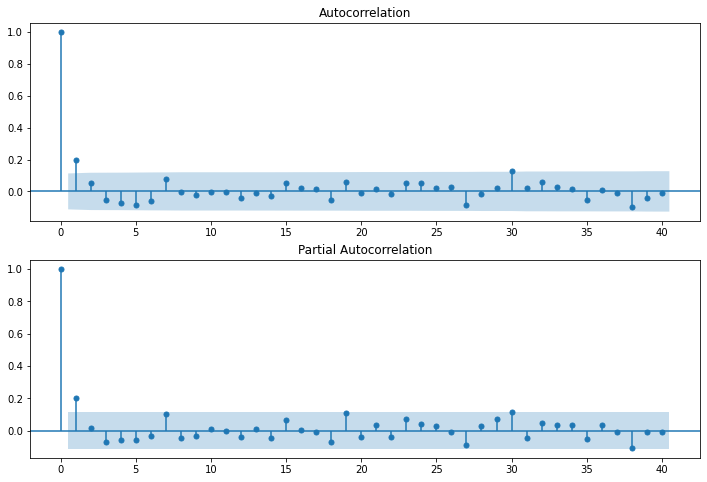

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and the PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(fred2['diff_log'], lags=40, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = plot_pacf(fred2['diff_log'], lags=40, ax=ax2)

# To use Box Jenkins Methodology, you must first look for a point where the ACF plot has a sharp drop
# To see if it is AT you have to look at the PACF plot and look for a significant spike, and for MA you look to see when the ACF has a significant spike
# After performing this I do not belive that the sequence shows AR, MA, or ARMA because neither graph show gradual decreases or a significant spike up
# the AR(|)MA structure of the series gives ideas about the characteristics of the time series and how it impacts the predictability of it

# Exercise \#4


On Canvas you will find two files in the "Take-Home Final Exam" module that are needed to successfully respond to this prompt. The first is a zip file titled Beijing Suburban Areas. It contains a shapefile describing the spatial extent of 107 urban subdistricts (jiedao) covering the city. The other is a csv file named “Beijing Variables”. It contains 14 variables described as follows:


- X1: Population Density (ppl/km2)
- X2: Natural Growth Rate (%)
- X3: Sex Ratio (M/F)
- X4: Labor Force Participation Rate (%)
- X5: Household Size
- X6: Dependency Ratio: number of non-workers per labor force participant
- X7: Income (yuan per person)
- X8: Public Service Density (number of government agencies and services per square kilometer)
- X9: Industrial Firm Density (firms/ km2)
- X10: Office/Retail Firm Density (firms/ km2)
- X11: Ethnic Enclave (dummy variable indicating high concentration ethnic minorities)
- X12: Floating Population Ratio (those with a registration status in the hukou system) and floating population (those with permanent resident status). The ratio is the floating population ratio as a portion of the entire district population
- X13: Living Space (m2/person)
- X14: Housing Price (yuan/m2)


A. Create a hierarchical clustering at varying cutoff levels between 2 and 9 clusters. For each clustering 2-9, report the number of observations assigned to each cluster in a table that looks like this:

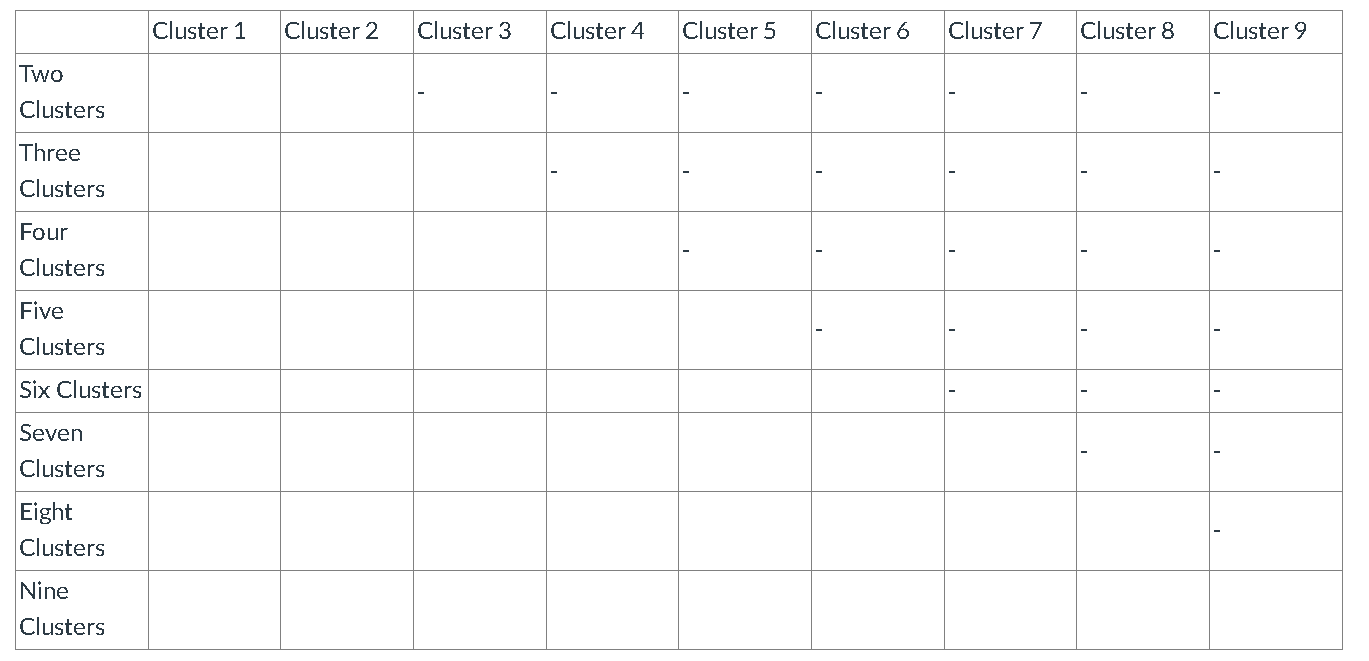

(3 points)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9
2 clusters,33,74,0,0,0,0,0,0,0
3 clusters,33,7,67,0,0,0,0,0,0
4 clusters,2,31,7,67,0,0,0,0,0
5 clusters,2,31,7,34,33,0,0,0,0
6 clusters,2,31,7,34,23,10,0,0,0
7 clusters,2,10,21,7,34,23,10,0,0
8 clusters,2,10,21,6,1,34,23,10,0
9 clusters,2,10,13,8,6,1,34,23,10


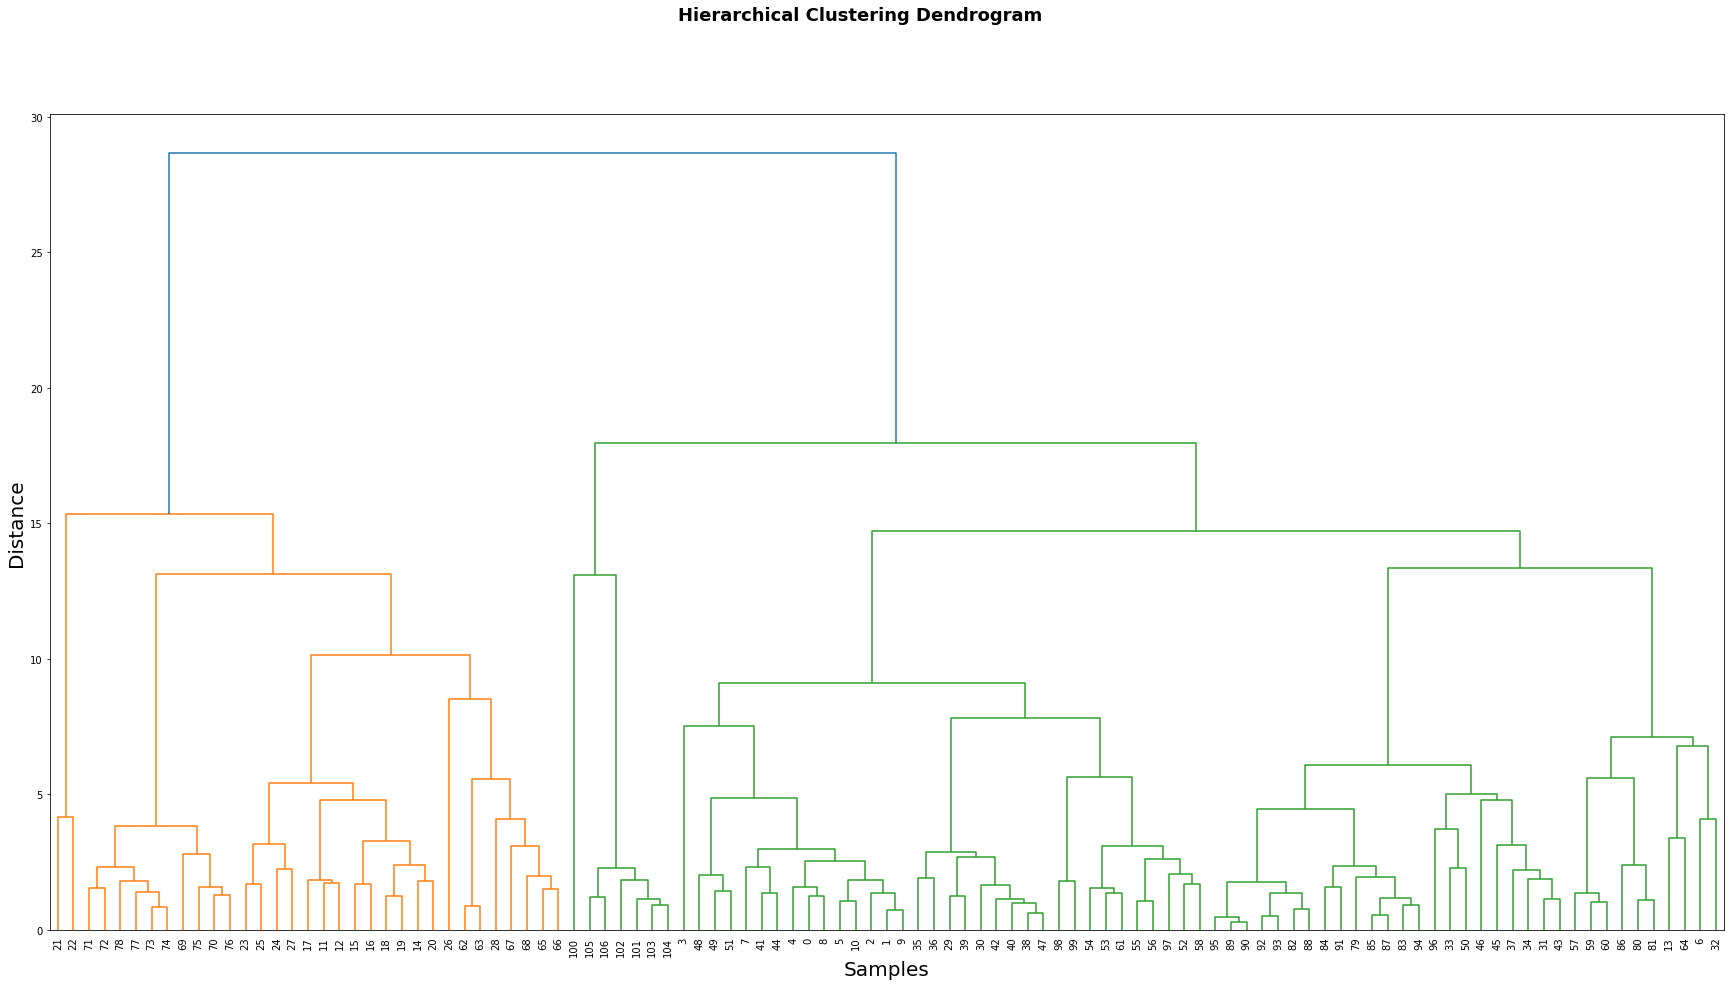

In [75]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn import preprocessing

# load in the data
beijing = pd.read_csv("../data/BJAttr.csv")
# Normalize each variable
std_scale = preprocessing.StandardScaler().fit(beijing)
data_std = std_scale.transform(beijing)

# Compute the distances between data points using the euclidean norm and then run the Hierarchical clustering algorithm
data_dist = pdist(data_std)
dist_matrix = linkage(data_dist,'ward', metric='euclidean')

def create_cluster_table(dist_matrix):

    plt.figure(figsize=(30, 15))
    dendrogram(dist_matrix, leaf_rotation=90.,leaf_font_size=10.)#,labels=df.dtype.names)
    plt.xlabel('Samples', fontsize=20)
    plt.ylabel('Distance', fontsize=20)
    plt.suptitle('Hierarchical Clustering Dendrogram', fontweight='bold', fontsize=18)
    plt.show

    cutoffs = range(2, 10)

    # Create empty table
    cluster_table = pd.DataFrame()

    for cutoff in cutoffs:
        # Assign clusters based on the cutoff
        clusters = fcluster(dist_matrix, cutoff, criterion='maxclust')

        # Count the number of observations in each cluster
        cluster_counts = pd.Series(clusters).value_counts().sort_index()

        # Rename the column as cluster number
        cluster_counts = cluster_counts.rename(lambda x: 'Cluster ' + str(x))

        # add the counts to the cluster_table
        cluster_table = pd.concat([cluster_table, cluster_counts], axis=1)

    # Fill NaN values with zeros
    cluster_table = cluster_table.fillna(0).astype(int)

    # Transpose the table to have clusters as columns and cutoff levels as rows
    cluster_table = cluster_table.transpose()

    # Set the index to the number of clusters
    cluster_table.index = [f"{num} clusters" for num in cutoffs]

    return cluster_table

create_cluster_table(dist_matrix)

B. Import that output file, as well as the Beijing Shapefile you were provided, into a new ArcGIS project. Once both files appear in your layers menu, right-click on the Shapefile and open the layer’s properties. Open the “joins” tab and initiate a new join. The join field will be “ref_id” and the Target field will be “REF_ID”. Click out and now look at the attribute table associated with your Shapefile, it should now be rich with variables, including the cluster designations you previously created. Use this layer and the underlying data to create a map using different colors to represent different clusters of subdistricts when the city is divided into two clusters. (3 points)



In [76]:
# Assign clusters based on the specified number and add the dataset
cluster_range = range(2, 10)
for num_clusters in cluster_range:
    clusters = fcluster(dist_matrix, num_clusters, criterion='maxclust')
    beijing[f'{num_clusters} Clusters'] = clusters
    

# save to a new csv file
beijing.to_csv("../data/clustered_BJAttr.csv", index=False)


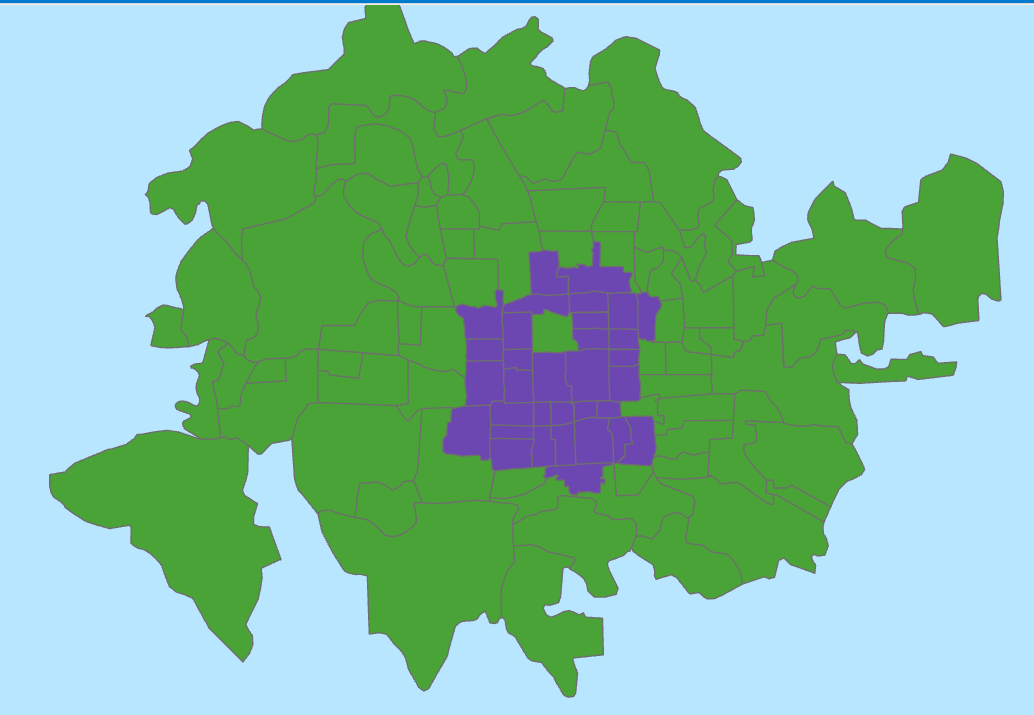

C. Describe the spatial patterns presented in the two cluster map using summary statistics. Are each of the clusters geographically contiguous? What attributes are the likely cause of each delineation between clusters? (1 point)

The clusters are likely not geographically contiguous because it appears that one cluster represents the middle of the city and the other the outside. There appears to be a clear spatial separation between the two clusters. I think this could be caused by population density with The middle of the city probably having a higher population density compared to the outskirts. There is also one section in the middle pf cluster 1 that is assigned to cluster two, this could be caused by the public service Density because maybe these ares do not have as many people

D. Use the same layer from (B) and the underlying data to create a map using different colors to represent different clusters of subdistricts when the city is divided into three clusters. (1 point)

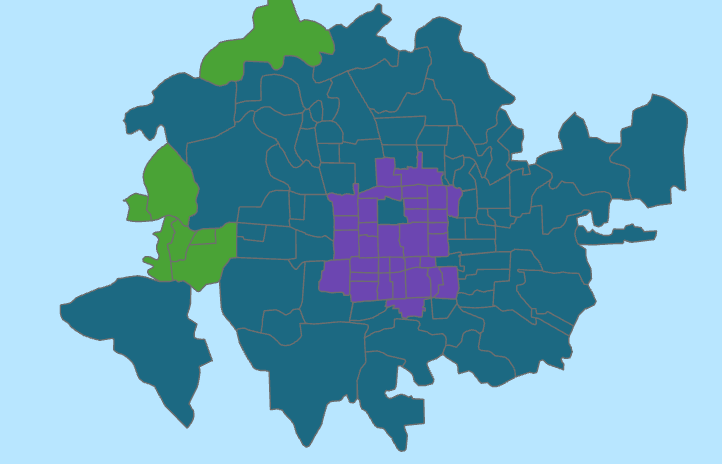

E. Describe the spatial patterns presented in the three cluster map using summary statistics. Are each of the clusters geographically contiguous? What attributes are the likely cause of each delineation between clusters? (1 point)

It still appears that the two biggest clusters are geographically contiguous because it seems to be seperated between the center region and the surrounding regions. But the third green cluster may not be geographicall contiguous because there are two distinct spatially seperated parts. I think that population density still has a big component in how the clusters are split up sense the inner city probably has a higher density. The different housing characteristics like living space and housing price could have influenced the delineation because may those sections of the west side that have cluster three have significantly different housing characteristics

F. Use the same layer from (B) and the underlying data to create a map using different colors to represent different clusters of subdistricts when the city is divided into four clusters. (1 point)

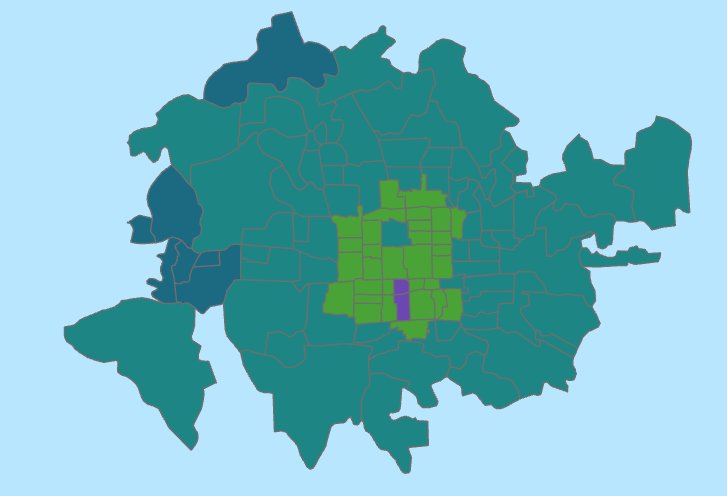

G. Describe the spatial patterns presented in the four cluster map using summary statistics. Are each of the clusters geographically contiguous? What attributes are the likely cause of each delineation between clusters? (1 point)

The four cluster map may not be entirely geographically contiguous because now there are several places that split into other clusters. I think there are still sections that show a little bit of contiguous because of the obvious split of the inside of the city vs the outside. This new fourth cluster that is in the middle of the cluster 1 could have been cause by population density because maybe this small are has a much higher population density than the other areas towards the inside of the city.

H. Use the same layer from (B) and the underlying data to create a map using different colors to represent different clusters of subdistricts when the city is divided into five clusters. (1 point)

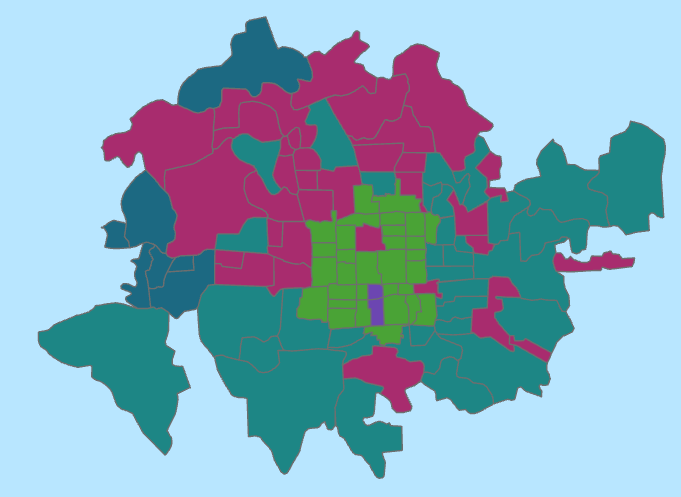

I. Describe the spatial patterns presented in the five cluster map using summary statistics. Are each of the clusters geographically contiguous? What attributes are the likely cause of each delineation between clusters? (1 point)

This new five-cluster map shows that the clusters are most likely not completetly geographically contiguous because of the new pink cluster that is dispersed all over the map. I think that these new delineation between clusters could be caused by economic factors. Some of these factors incluse income and industrial firm density. These could both cause a wider dispered cluster because there are probably divere econic characteristics arround the city.

J. Use the same layer from (B) and the underlying data to create a map using different colors to represent different clusters of subdistricts when the city is divided into seven clusters. (1 point)

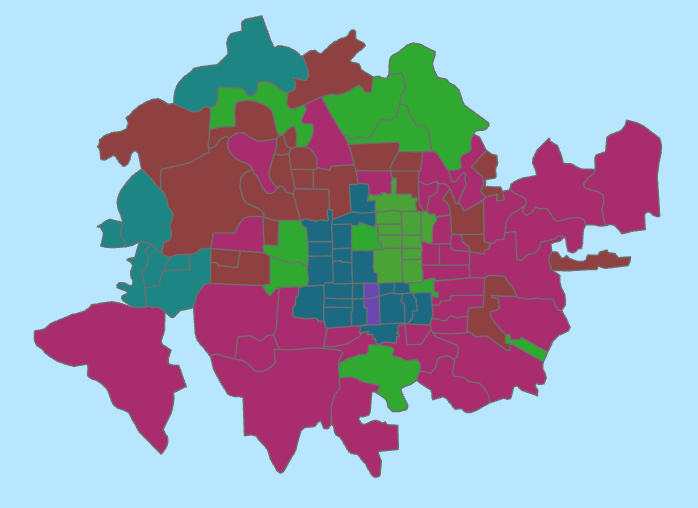

K. Describe the spatial patterns presented in the seven cluster map using summary statistics. Are each of the clusters geographically contiguous? What attributes are the likely cause of each delineation between clusters? (2 points)

The new seven cluster map suggests that the clusters may have some contiguous and non-contiguous patterns. The center and nothern part of the city are split into many different clusters while the souther and eastern parts are only split in a few. This could be cause by some economic and demographic diversity which are shown in many attributes. The sex ratio and ethnic enclave attributes may show a more diverse areas in the center and northern parts of the city but not so much in the southern.

L. Identify two variables that you believe could be safely omitted from this analysis without appreciably changing the maps that would result. Then omit those variables and repeat the clustering algorithm. Re-create the maps from parts (B), (D), (F), (H), and (J), again using different colors to represent different clusters of subdistricts. Make sure the cluster ID is also presented in each unique feature. Do your maps look similar to those you created in parts parts (B), (D), (F), (H), and (J)? Why or why not – explain the spatial pattern in terms of the underlying variables. (2 points)


In [77]:
# load in the data
beijing = pd.read_csv("../data/BJAttr.csv")
beijing_omitted = beijing.drop(['x5', 'x6'], axis=1)
# Normalize each variable
std_scale = preprocessing.StandardScaler().fit(beijing_omitted)
data_std = std_scale.transform(beijing_omitted)
# Compute the distances between data points using the euclidean norm and then run the Hierarchical clustering algorithm
data_dist = pdist(data_std)
dist_matrix = linkage(data_dist,'ward', metric='euclidean')

# Assign clusters based on the specified number and add the dataset
cluster_range = range(2, 10)
for num_clusters in cluster_range:
    clusters = fcluster(dist_matrix, num_clusters, criterion='maxclust')
    beijing_omitted[f'{num_clusters} Clusters'] = clusters

# save to a new csv file
beijing_omitted.to_csv("../data/clustered_BJAttr_omitted.csv", index=False)

I think that Household Size (X5) and Dependency Ratio (X6) might beable to be ommited because they may have less influence on the clustering patterns.

2 cluster map:

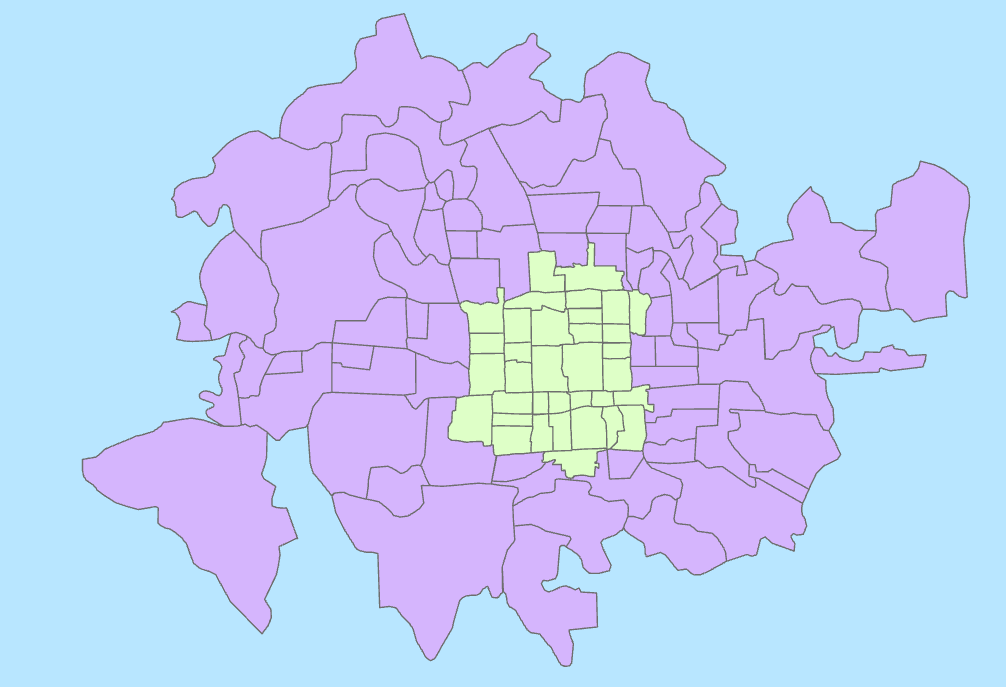

3 cluster map:

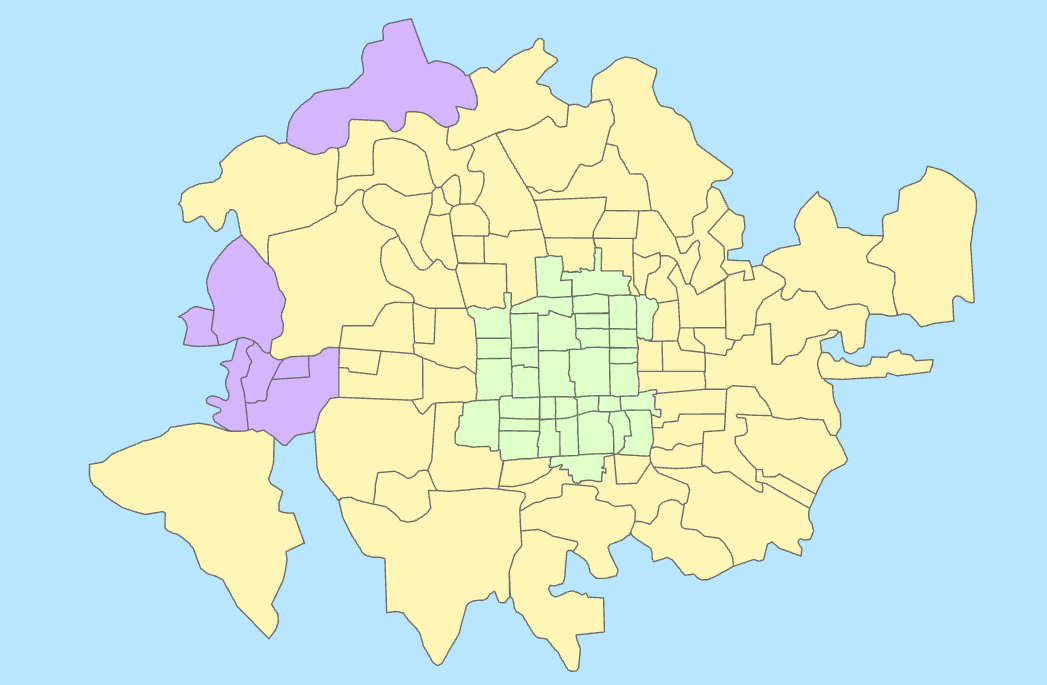

4 cluster map:

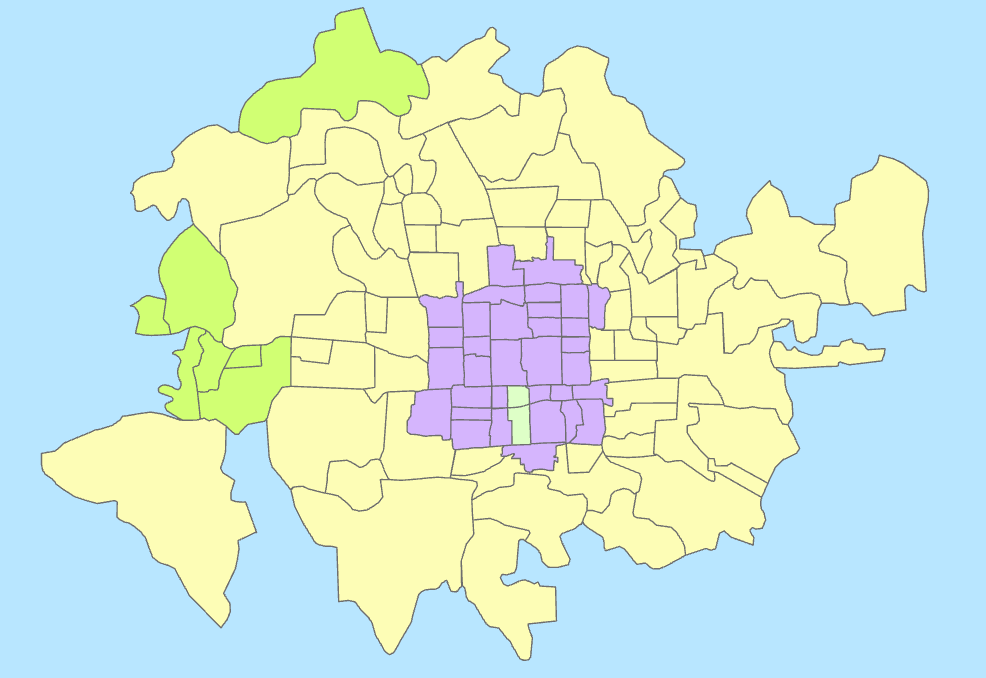

5 cluster map:

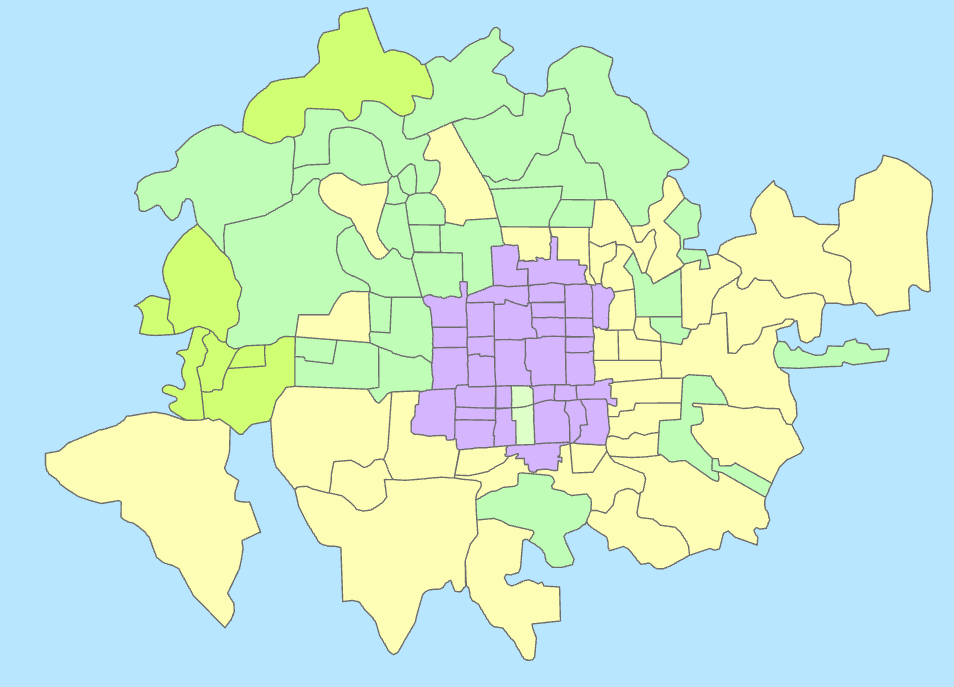

7 cluster map:

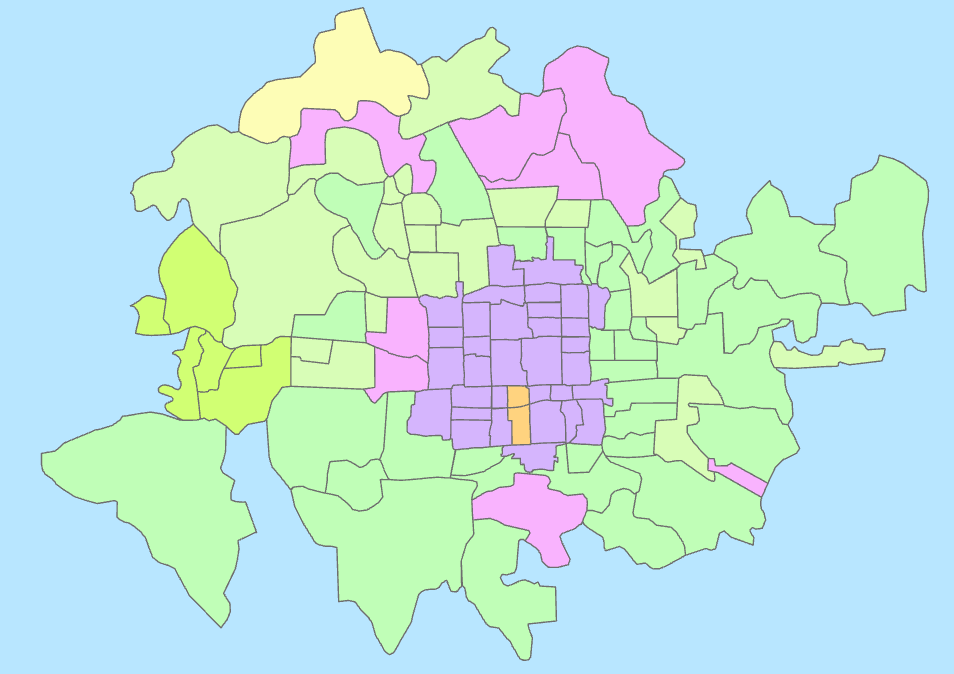


The graphs are very similar as they have the same trends as you increase in clusters but there are a few differences. The clusters seem to be slightly different in each iteration but are in the same areas. However the center of the city difference stood out the most to me with it remaining in pretty much one cluster through every iteration except for a small section. This could show that household size and dependency ratio did actually have an impact of the clustering of the center area. That means my hypothesis that these variable did not have any impact was most likely incorrect.

M. See the map below. In 1998 Beijing was a city of less than ten million residents divided between four urban city districts and four suburban districts. The population has more than doubled since then. These demarcations were generated by humans, but likely aren’t dissimilar from those you generated via unsupervised machine learning – clustering. Describe the differences between these districts and those you generated. Why might you find more non-contiguous subdistricts in your clusterings compared to the official district boundaries? How might you expect your clustering algorithm to perform using updated variables – will they still describe similar neighborhood areas?

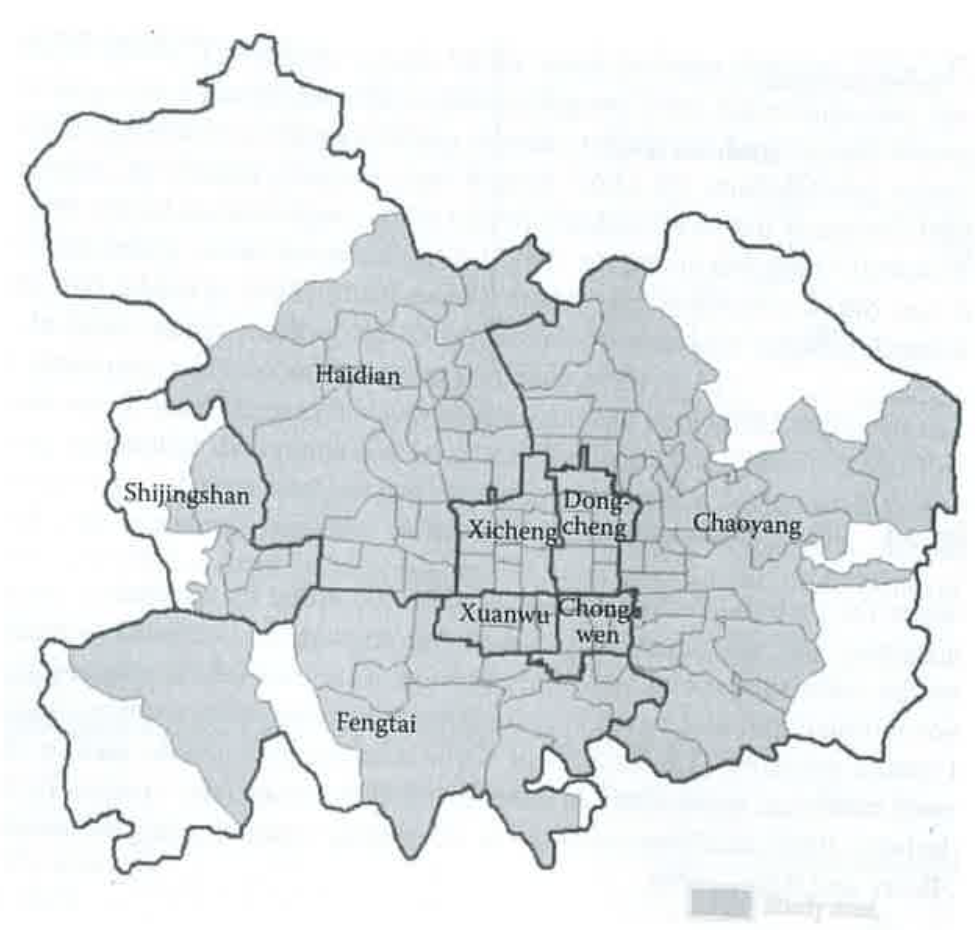 

(3 point)

The clustering algorithm that I performed most likely considers a much broader set of variables than that of the official district assigning. The clustering algorithm considers more nuanced characteristics of a neighborhood and area but the official boundaries are probably more based off of historical criteria and political boundaries. If the updated variables would be able to gather more relevant features that influence a neighborhood than the clustering algorithm would probably adapt and become more similar

# Exercise \#5

This exercise will require you to download, organize, clean, and visualize Citibike trip data. 



A. Begin writing a piece of code in the block below that uses loops to download all Citibike trip data from February 2019-February 2021. This data is indexed and hosted online [HERE](https://s3.amazonaws.com/tripdata/index.html). Then append all of the downloaded files into a single Pandas DataFrame. (2 points)

In [78]:
import requests, zipfile, io, os
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

# URL of the BART ridership reports page
base_url = "https://s3.amazonaws.com/tripdata/"

# Directory to save the downloaded reports
save_dir = os.path.join(os.getcwd(), "Citibike_Reports")
os.makedirs(save_dir, exist_ok=True)

# Find and download the monthly ridership reports from feb 2019-2021
months = ['01','02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
# Find and download the monthly ridership reports from feb 2019-20221
for year in range(2019, 2022):
    if year == 2019:
        for m in months[1:]:
            year_url = base_url+str(year)+str(m)+"-citibike-tripdata.csv.zip"
            print(year_url)
            if str(year)+str(m)+"-citibike-tripdata.csv" not in os.listdir(save_dir):
                r = requests.get(year_url)
                z = zipfile.ZipFile(io.BytesIO(r.content))
                z.extractall(save_dir)
    elif year == 2021:
        for m in months[:2]:
            year_url = base_url+str(year)+str(m)+"-citibike-tripdata.csv.zip"
            print(year_url)
            if str(year)+str(m)+"-citibike-tripdata.csv" not in os.listdir(save_dir):
                r = requests.get(year_url)
                z = zipfile.ZipFile(io.BytesIO(r.content))
                z.extractall(save_dir)
    else:
        for m in months:
            year_url = base_url+str(year)+str(m)+"-citibike-tripdata.csv.zip"
            print(year_url)
            if str(year)+str(m)+"-citibike-tripdata.csv" not in os.listdir(save_dir):
                r = requests.get(year_url)
                z = zipfile.ZipFile(io.BytesIO(r.content))
                z.extractall(save_dir)

https://s3.amazonaws.com/tripdata/201902-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201903-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201904-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201905-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201906-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201907-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201908-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201909-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201910-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201911-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201912-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202001-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202002-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202003-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/202004-citibike-tripdata.csv

In [79]:
import os

# Path to the folder containing CSV files
folder_path = r"C:\\Users\\carso\\OneDrive - UW-Madison\\23_24_Fall\\econ695\\final\\Citibike_Reports"

# List to store individual DataFrames
dfs = []

# Loop through CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

c:\Users\carso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
#final_df.to_csv("citibike_final_data.csv", index=False)
#len(final_df.index)

B. Create a series of data visualizations showing the distribution of Citibike trip lengths by borough. Round each trip length UP to the nearest five minute increment, meaning that a 45 second long trip would become a 5 minute long trip, whereas a trip lasting 9 minutes and 59 seconds would be coded as a 10 minute long trip. If you are able, overlap these distributions on a single plot using different colors for each borough. Otherwise just write code to create five seperate plots. Discuss your results. Were the distributions different/similar across boroughs - and how so? (5 points)

In [81]:
# I decided to only use the first 100,000 observations of the dataset because I found that the total number of observations for the dates we did is over 40 million
# I tried running my code with all of the observations but it simply would not work and took way too long and even caused my computer to crash once
# I belive that showing that I could do it with 100,000 observations shows that if i had more time and resources, I would beable to perform the analysis just by changing a few lines of code
pd.set_option('display.max_columns', None)
df = final_df.copy(deep=True)
df = df.head(100000)
df.to_csv("citibike_100_data.csv", index=False)
citibike_100 = pd.read_csv("citibike_100_joined.csv")

c:\Users\carso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (35,41,42,44,48,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


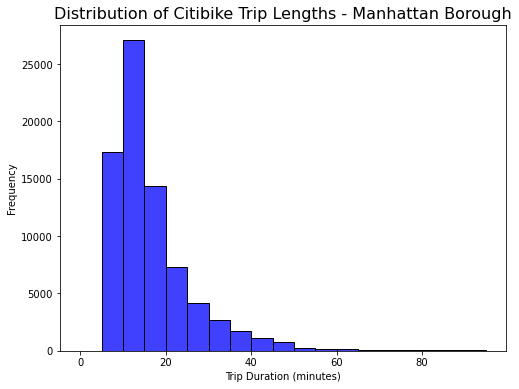

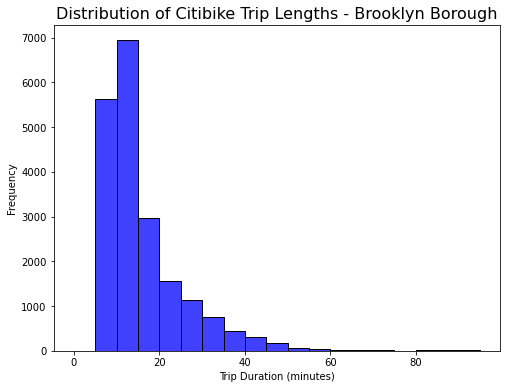

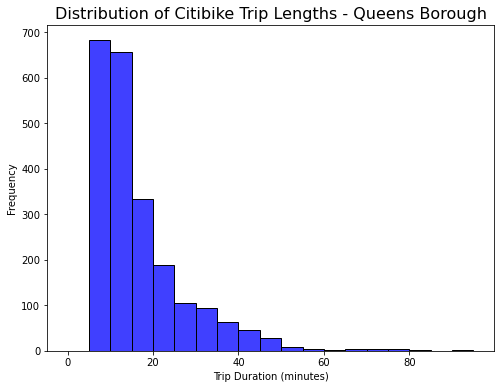

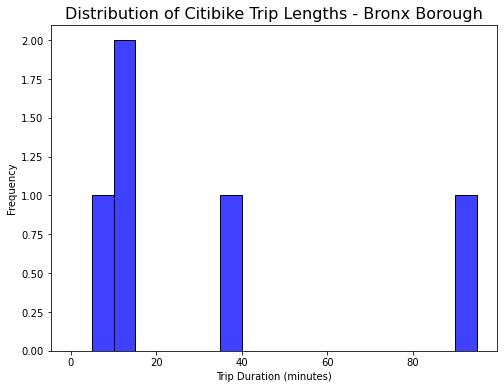

In [82]:
citibike_100['trip_duration_rounded'] = np.ceil(citibike_100['tripduration'] / 300) * 300

# Create separate DataFrames for each borough
borough_dfs = [citibike_100[citibike_100['boro_name_1'] == borough] for borough in citibike_100['boro_name_1'].unique()]

# Set up the plotting environment
for borough_df in borough_dfs:
    plt.figure(figsize=(8, 6))
    plt.title(f'Distribution of Citibike Trip Lengths - {borough_df["boro_name_1"].iloc[0]} Borough', fontsize=16)
    sns.histplot(borough_df['trip_duration_rounded'] / 60, bins=range(0, 100, 5), color='blue')
    plt.xlabel('Trip Duration (minutes)')
    plt.ylabel('Frequency')
    plt.show()

C. Stations don't always have the same number of trips start and end at that location. There are some common point-to-point trips that empty bikes out of one station and pile them up at another. As a result some stations have many more trips start at that location than end there and vice-versa.

To fix this problem, Citibike employees will take bikes from common drop-off (end) locations and drive them to common pick-up (start) locations. In the block below, write a bit of code that will calculate the difference between the number of trips started and ended at each station over the entire dataset. Use this variable to generate two horizontal bar charts. The first should show the 10 stations with the largest surplus in bikes (more trips end at the location than start there). The second should show the 10 stations with the largest deficit in bikes (more trips start at the location than end there). (4 points)

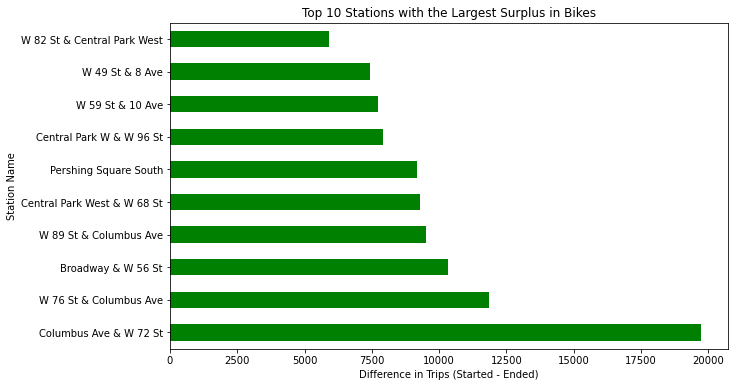

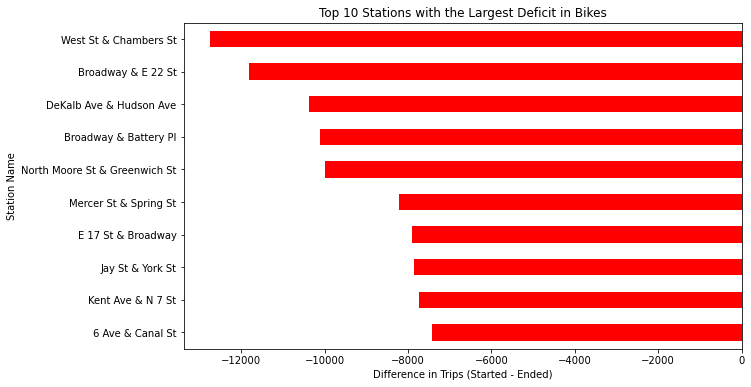

In [83]:
# Calculate the difference between trips started and ended at each station
final_df['trip_duration_rounded'] = np.ceil(final_df['tripduration'] / 300) * 300
station_diff = final_df.groupby('start station name')['trip_duration_rounded'].count() - final_df.groupby('end station name')['trip_duration_rounded'].count()

# Sort the stations based on the difference
sorted_stations = station_diff.sort_values(ascending=False).dropna()

# Plot the top 10 stations with the largest surplus
plt.figure(figsize=(10, 6))
sorted_stations.head(10).plot(kind='barh', color='green')
plt.title('Top 10 Stations with the Largest Surplus in Bikes')
plt.xlabel('Difference in Trips (Started - Ended)')
plt.ylabel('Station Name')
plt.show()

# Plot the top 10 stations with the largest deficit
plt.figure(figsize=(10, 6))
sorted_stations.tail(10).plot(kind='barh', color='red')
plt.title('Top 10 Stations with the Largest Deficit in Bikes')
plt.xlabel('Difference in Trips (Started - Ended)')
plt.ylabel('Station Name')
plt.show()

D. Finally, use ArcGIS to create a choropleth showing the neighborhoods with the most Citibike trip activity in 2019. The Final Exam module contains a shapefile titled "Neighborhoods_NYC". Proceed in three steps to complete this task:
1. Load both this shapefile and your 2019 Citibike trip data into ArcGIS and use the spatial join operation to like each start and end location to a neighborhood name. 
2. Export the joined data's attribute table(s) and open them as DataFrames using Python. Split the DataFrame in two depending upon whether or not the trip starts/ends in the same neighborhood. Get a count of the number of observations (trips) starting OR ending in a particular neighborhood in each DataFrame. Finally, create a single table with the neighborhood identifier and combined 'trip activity' tally from both DataFrames.
3. Add that table to an ArcGIS project along with the Neighborhoods_NYC shapefile. Complete a spatial join and create a choropleth using the trip activity variable you created in step 2. Include a title, legend, and format the choropleth to be of professional quality before exporting and pasting your final product below.

(7 points)

In [84]:
neighbor = pd.read_csv("start_end_join.csv")

# Split the DataFrame based on whether the trip starts/ends in the same neighborhood
same_neighborhood = neighbor[neighbor['NTAName_1'] == neighbor['NTAName']]
different_neighborhood = neighbor[neighbor['NTAName_1'] != neighbor['NTAName']]

# Get counts of trips starting or ending in a particular neighborhood
start_counts = neighbor['NTAName_1'].value_counts().reset_index()
end_counts = neighbor['NTAName'].value_counts().reset_index()

# Merge counts based on the neighborhood identifier
combined_counts = pd.merge(start_counts, end_counts, how='outer')

# Rename columns
combined_counts.columns = ['Neighborhood', 'Start_Trips', 'End_Trips']

# Fill NaN values with 0
combined_counts = combined_counts.fillna(0)

# Calculate combined 'trip activity' tally
combined_counts['Total_Trips'] = combined_counts['Start_Trips'] + combined_counts['End_Trips']

# Display the combined table
combined_counts.to_csv("start_end_counts.csv", index=False)

In [85]:
combined_counts

,Neighborhood,Start_Trips,End_Trips,Total_Trips
0,Chelsea-Hudson Yards,7982.0,7862,15844.0
1,Midtown South-Flatiron-Union Square,6225.0,5930,12155.0
2,Midtown-Times Square,5939.0,5488,11427.0
3,East Village,5787.0,6288,12075.0
4,Murray Hill-Kips Bay,4924.0,4772,9696.0
5,Greenwich Village,4379.0,4218,8597.0
6,Financial District-Battery Park City,3831.0,3406,7237.0
7,SoHo-Little Italy-Hudson Square,3598.0,3248,6846.0
8,West Village,3449.0,3422,6871.0
9,Williamsburg,3209.0,3208,6417.0


Put your Choropleth here:

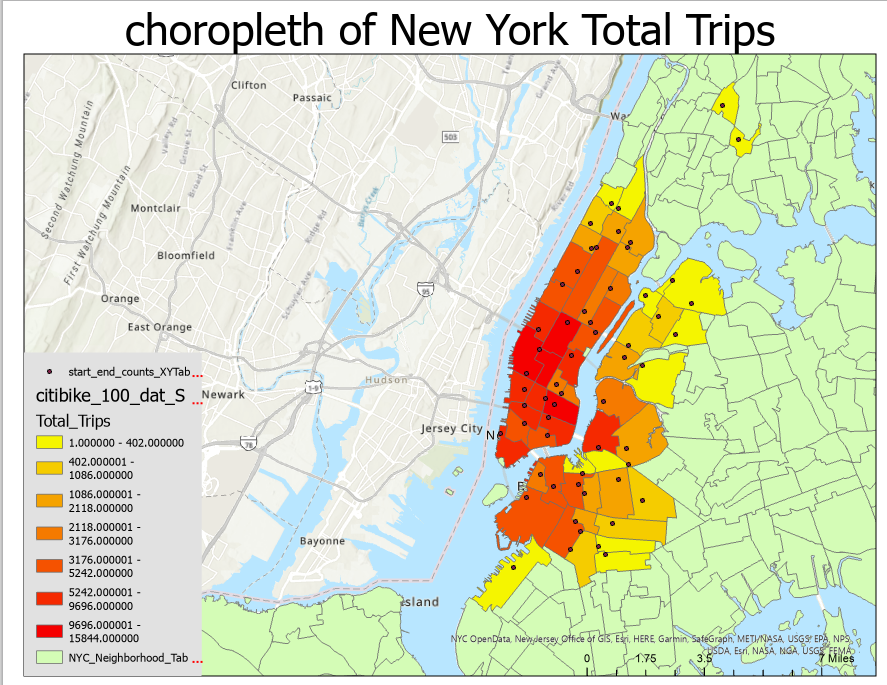